# Class 06: Graphing in Python 2 part 1

Matplotlib - density plots & 2D graphics 

- Complete the activities as instructed by the professor

#### Import any packages we need below (update as we go):

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Density Plots 


####  Creating a density plot

- Read in the 'circular.txt' data
- create a density plot
- switch the origin to the lower left


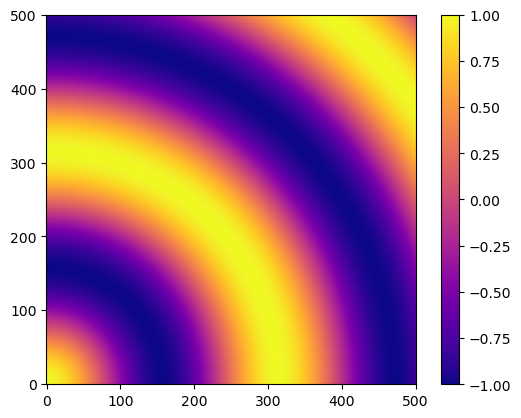

In [ ]:
data = np.loadtxt('circular.txt',float)

plt.imshow(data,origin = 'lower')
plt.plasma()
plt.colorbar()

plt.show()




#### Color-scales and colorbars
-  For the plot above: 
    - change the color-scale 
    - add a colorbar

#### Additional Density Plot Customizations 
- Play around with `extent` to see how it impacts the density plot 
- change the axis ratio using `aspect`

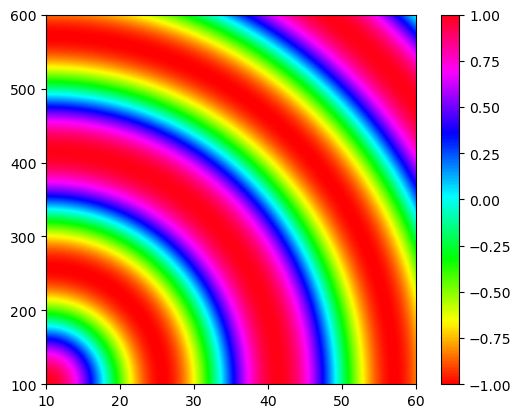

In [16]:
plt.imshow(data,origin = 'lower',extent=[10,60,100,600],aspect=0.1)
plt.hsv()
plt.colorbar()

plt.show()

#### Book Example: Wave interference (page 108)

Suppose we drop a pebble in a pond and waves radiate out from the spot where it fell. We could create a simple representation of the physics with a sine wave, spreading out in a uniform circle, to represent the height of the waves at some later time. If the center of the circle is at $x_1$, $y_1$ then the distance $r_1$ to the center from a point $x, y$ is

For the distance from the center of a circlular wave:

$$ r_1 = \sqrt{(x-x_1)^2+(y-y_1)^2} $$
and the height of the wave on a surface would be sinusoidal:

$$ h_1(x,y) = h_0\sin{kr_1} $$
where $k = 2\pi/\lambda$ is the wave vector. 

To superimpose two waves, we need a second set of distances and heights: 

$$ r_2 = \sqrt{(x-x_2)^2+(y-y_2)^2} $$

$$ h_2(x,y) = h_0\sin{kr_2} $$


The superposition is of the heights at any location: 

$$ h(x,y) = h_0\sin{kr_1} + h_0\sin{kr_2}$$

Suppose the wavelength of the waves is $\lambda$ = 5 cm, the amplitude is 1 cm, and the centers of the circles are 20 cm apart. Here is a program to make an image of the height over a 1 m square region of the pond. To make the image we create an array of values representing the height $h$ at a grid of points and then use that array to make a density plot. In this example we use a grid of 500 × 500 points to cover the 1 m square, which means the grid points have a separation of 100/500 = 0.2 cm.

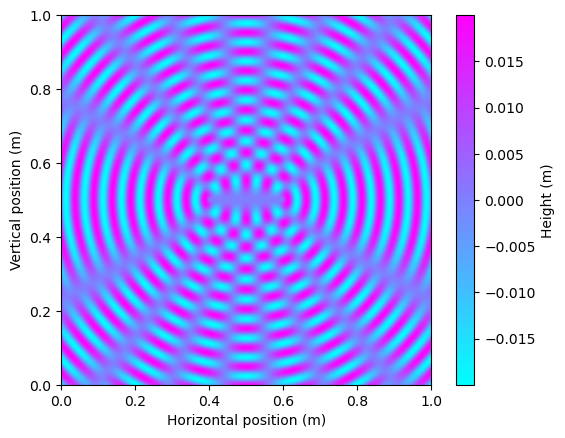

In [34]:
lda = 0.05 #m, wavelength
h0 = 0.01 #m, amplitude
sep = 0.2 #m, separation of centers

k = 2*np.pi/lda #wave vector



side = 1 #m, size of pond (square)
points = 500 #num points per side of array
spacing = side/points #distance between points in m


#center positions of each circle
x1 = (side-sep)/2
y1 = side/2 #halfway up side
x2 = (side+sep)/2
y2 = side/2 #halfway up side


h = np.zeros([points,points],float) #array with superpositions

for i in range(points):
    y = i*spacing
    for j in range(points):
        x = j*spacing


        r1 = np.sqrt((x-x1)**2+(y-y1)**2)
        h1 = h0*np.sin(k*r1) #wave 1 height at x,y

        r2 = np.sqrt((x-x2)**2+(y-y2)**2)
        h2 = h0*np.sin(k*r2) #wave 2 height at x,y

        h[i,j] = h1 + h2 #superposition of heights



plt.imshow(h,origin='lower',extent=[0,1,0,1])
plt.colorbar(label='Height (m)')
plt.cool()
plt.xlabel('Horizontal position (m)')
plt.ylabel('Vertical position (m)')

plt.show()


#### Create an array to make a density plot

Create an array that is 50x50 for a density plot. To do so: 
- create a 1D array `theta` that is 50 values equally spaced between 0 and 3$\pi$ 
- create an 2 arrays: each should be a 1D array that is $5\sin$(`theta`)
- Now, in a 2D array that is 50x50, loop through the add the two arrays together 

## Drawings in Python

In [1]:
from qdraw import window, circle, square, show, draw
import numpy as np
import matplotlib.pyplot as plt
import math

#### Let's create a window that has a circle

- Note, you must use `draw()` for the separate window to pop up. It will remain open and continue to update each time you call `draw()` again 
    - you will have to restart the kernel when it is closed though! 
- You can alternatively use `show()` but if you then close the window, which you will have to, you will need to restart the kernel to do anything else. 

In [5]:
window(xlim=[-1,1],ylim=[-1,1])
circle(pos=[0,0],size=1,color='blue') #the earth!

draw()

#### We can add a second circle that is green!

In [ ]:
circle(pos=[0.5,0.5],size=0.25,color='gray') #the moon! (not to scale)
draw()


#### And we can put a lattice of squares on top of that. 

In [7]:
L = 1
s = 0.3

for i in range(-L,L+1):
    for j in range(-L,L+1):
        square(pos=[i,j],size=s,color='#00bb00')
        draw(0.5)

#### Atomic Lattice Example

#### Let's make a circle move! 